# Конкурс в Kaggle


### Цель конкурса - больше самостоятельной работы,  создание портфолио и веселое времяпрепровождение :)

Конкурсное задание - прогноз задержки трамваев в Кракове.

![](../images/krakow_tram.jpeg)


Метрикой успеха будет: [MAE](https://bit.ly/3tmzOC0).

### Kaggle 
Конкурс будет доступный в Kaggle - ссылка на [конкурс](https://www.kaggle.com/t/bc7f47a90c7d4056803c71bd3c64a76c).

### Регистрация
Если у Тебя еще нет учетной записи в Kaggle, пожалуйста, [создай аккаунт](https://bit.ly/3tfXl80).

Kaggle - крупнейшее сообщество машинного обучения в мире (но и до недавних пор DataWorkshop были только в Польше, а теперь и в Рунете;)). Поэтому, если хочешь отнестись к этому серьезно, вдохновиться или время от времени участвовать в конкурсах, рекомендую создать  аккаунт в Kaggle.

### Правила
1. Конкурс начинается **18 октября 2021 г.** и заканчивается в воскресенье, **31 октября 2021 г. в 23:59** (по Москве).
2. Участники с результатом из ТОП 3 получат наши фирменные футболки. Места будут видны в **Public Leaderboard** на протяжении всего соревнования.
3. Набор данных разделен на две части: Public и Private. Набор данных Public содержит признаки + ответ, а набор Private только признаки. По окончании конкурса окончательный результат будет виден в **Private Leaderboard**.
4. Данные подготовлены в образовательных целях. Запрещается использовать их для каких-либо целей, кроме этого курса, и запрещено каким-либо образом публиковать данные (кроме своего профиля в GitHub). Решение должно быть основано только на машинном обучении (обучение модели на основе общих данных). Совмещать не нужно, сосредоточься на обучении :).
5. Нельзя формировать команды в этом соревновании. Каждый участник может добавить решение (т.е. сделать так называемый *submit*) до 5 попыток решения за один день (так что начни раньше, попыток будет больше 😉).
6. Участники, занявшие 1-е, 2-е и 3-е места, опубликуют свое решение для всех (в течение недели после победы) и поделятся им, предоставив ссылку в Slack на свой GitHub.
7. Приз будет отправлен в течение 2-3 недель.



### Данные

В данных есть **308152** строки, которые разделены почти на равные части:
- `tram.train.h5` (175 986 строк)
- `tram.test.h5` (132 166 строк)


Когда сделаешь `submit` в Kaggle, это будет рассчитанный результат. Обрати внимание, что результат рассчитывается только на 30% тестовых данных, и этот результат отображается на **Public LeaderBoard** в течение всего конкурса, а по завершении конкурса, итоговый результат будет в **Private Leaderboard**.

![](../images/leader_board.jpeg)

На практике это означает, что в Твоем обучающем наборе есть ответы, но Тебе нужно обучить модель, чтобы можно было сначала проверить ее локально (т.е. использовать, например, перекрестную проверку или что-то более сложное). Затем загрузить свой результат в Kaggle (в виде файла csv). В течение дня у Тебя есть максимум 5 попыток (чем раньше начнешь участвовать в конкурсе, тем больше будет попыток). Во время конкурса Твой рассчитанный результат проверяется только на части данных (в данном случае 50%). Это так называемый `Public Leader Board`.

Когда соревнование закончится, результат будет преобразован во все доступные тестовые данные и будет доступен в `Private LeaderBoard` Зачем это делается? Дело в том, что Твое решение должно быть максимально стабильным как на самой маленькой, так и на большей выборке данных. Следовательно, Тебе нужно проводить валидацию осторожно, потому что первое место в `Public LeaderBoard` не обязательно будет первым местом в `Private LeaderBoard` :) Остерегайся этого!


## Подарок
### За первые 3 места
![Футболка](../images/present.jpeg)

## Возможности

Когда мы анализируем реальные данные, всегда (обычно ML говорит, возможно/часто, но в этом случае это само собой разумеющееся) будет много разных проблем ...


Мы намеренно искали такие данные и проблему, чтобы внести некоторые трудности, с которыми Тебе нужно справиться.

Почему? Цель этого конкурса - лучше подготовить Тебя к реальному столкновению с реальностью работы в области науки о данных и машинного обучения. Проблемы есть везде. Это всего лишь замена, но она уже достаточно осязаема, чтобы дать Тебе осознать определенные проблемы и дать Тебе очень ценный опыт, который будет полезен, когда Ты столкнешься со своим первым проектом. Кроме того, на этом этапе Ты начинаешь формировать свое портфолио, поэтому мы позаботились о том, чтобы Тебе было чем гордиться;)

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)

from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor

## Данные
Это реальные данные.

**Примечание!** Данные могут использоваться только для **образовательных целей** (также не могут быть опубликованы или переданы другим)!

In [ ]:
df_train = pd.read_hdf('../input/tram.train.h5')
df_test = pd.read_hdf('../input/tram.test.h5') #тестовый набор без ответа

## Проверим данные

In [ ]:
df_train.sample(15)

## Basic Model

In [ ]:
feats = ["id"]
X_train = df_train[feats].values
X_test = df_test[feats].values
y_train = df_train["delay"].values


model = DummyRegressor()
model.fit(X_train, y_train)
df_test["delay"] = model.predict(X_test)

## Submission

Создадим папку `output`, в нее сохраним результаты.

In [ ]:
!mkdir -p ../output

Сохраняем файл `csv`.

In [ ]:
df_test[ ["id", "delay"] ].to_csv('../output/model_dummy.csv', index=False) 

## Что дальше?

Начни более точно исследовать, какие данные у Тебя есть, стимулируй свое воображение и начинай действовать!

In [2]:
import pandas as pd
import numpy as np
np.random.seed(0)
#from sklearn.metrics import mean_absolute_error
#from sklearn.dummy import DummyRegressor #использовали на первом этапе
import xgboost as xgb

#Загрузка данных
df_train = pd.read_hdf('../input/tram.train.h5')
df_train["planned_time"] = pd.to_datetime(df_train["planned_time"])
df_test = pd.read_hdf('../input/tram.test.h5') #тестовый набор без ответа


In [3]:
df = pd.concat([df_train, df_test])

#print("После конкатенации df_train", df_train.shape, "и df_test", df_test.shape, "получили df ", df.shape)


После конкатенации df_train (175986, 11) и df_test (132166, 10) получили df  (308152, 12)


In [3]:
#df[ df["delay"].isnull() ] #проверил - пустых столько же сколько размер df_test

In [4]:
#feature engineering (фичи появятся и в обучающей и в тестовой таблице)
df["planned_time"] = pd.to_datetime(df["planned_time"])
df["planned_time_ymd"] = df["planned_time"].map(lambda x: x.strftime("%Y-%m-%d"))
df["planned_time_hour"] = df["planned_time"].dt.hour
df["stop_name_cat"] = df["stop_name"].factorize()[0]
df["direction_cat"] = df["direction"].factorize()[0]

## group
def df_group_delay(df_train, groupby_feats):
    agg_params = {
        "mean_{}_delay".format("_".join(groupby_feats)): ("delay", "mean"),
        "median_{}_delay".format("_".join(groupby_feats)): ("delay", "median"),
        "count_{}_delay".format("_".join(groupby_feats)): ("delay", "count"),
        "std_{}_delay".format("_".join(groupby_feats)): ("delay", "std"),
        "count_zeros_{}_delay".format("_".join(groupby_feats)): ("delay", lambda vals: len([x for x in vals if x == 0]) ),
        "prob_zeros_{}_delay".format("_".join(groupby_feats)): ("delay", lambda vals: np.mean([x == 0 for x in vals]) ),
    }
    
    return df_train[groupby_feats + ["delay"]].groupby(groupby_feats).agg(
        **agg_params
    ).reset_index()

df_tmp = df_group_delay(df_train, ["stop_name"])
if "mean_stopname_delay" not in df:
    df = pd.merge(df, df_tmp, on="stop_name", how="left")
    
df_tmp = df_group_delay(df_train, ["stop_name", "direction"])
if "mean_stopname_direction_delay" not in df:
    df = pd.merge(df, df_tmp, on=["stop_name", "direction"], how="left")
    
### shift
def df_group_delay_shift(df_train, groupby_feats, shift):
    df_train["planned_time_{}d".format(shift)] = df_train["planned_time"] + pd.Timedelta(days=shift)
    df_train["planned_time_{}d_hour".format(shift)] = df_train["planned_time_{}d".format(shift)].dt.hour
    df_train["planned_time_{}d_ymd".format(shift)] = df_train["planned_time_{}d".format(shift)].map(lambda x: x.strftime("%Y-%m-%d"))
    
    groupby_feats = ["planned_time_1d_ymd", "planned_time_1d_hour"] + groupby_feats
    
    agg_params = {
        "mean_1d_{}_delay".format("_".join(groupby_feats)): ("delay", "mean"),
        "median_1d_{}_delay".format("_".join(groupby_feats)): ("delay", "median"),
        "count_1d_{}_delay".format("_".join(groupby_feats)): ("delay", "count"),
        "std_1d_{}_delay".format("_".join(groupby_feats)): ("delay", "std"),
        "count_1d_zeros_{}_delay".format("_".join(groupby_feats)): ("delay", lambda vals: len([x for x in vals if x == 0]) ),
        "prob_1d_zeros_{}_delay".format("_".join(groupby_feats)): ("delay", lambda vals: np.mean([x == 0 for x in vals]) ),
    }
    
    return df_train[groupby_feats + ["delay"]].groupby(groupby_feats).agg(
        **agg_params
    ).reset_index()

if "mean_1d_planned_time_1d_ymd_planned_time_1d_hour_number_delay" not in df:
    df_tmp = df_group_delay_shift(df_train, ["number"], shift=1)
    
    df = pd.merge(df, df_tmp, left_on=["planned_time_ymd", "planned_time_hour", "number"]
    , right_on=["planned_time_1d_ymd", "planned_time_1d_hour", "number"]
    , how="left")

#### feature selection
feats = df.select_dtypes("number").columns
black_list = ["id", "delay", "vehicle_id", "trip_id"]
feats = [x for x in feats if x not in black_list]
print(feats)


['stop', 'number', 'seq_num', 'planned_time_hour', 'stop_name_cat', 'direction_cat', 'mean_stop_name_delay', 'median_stop_name_delay', 'count_stop_name_delay', 'std_stop_name_delay', 'count_zeros_stop_name_delay', 'prob_zeros_stop_name_delay', 'mean_stop_name_direction_delay', 'median_stop_name_direction_delay', 'count_stop_name_direction_delay', 'std_stop_name_direction_delay', 'count_zeros_stop_name_direction_delay', 'prob_zeros_stop_name_direction_delay', 'planned_time_1d_hour', 'mean_1d_planned_time_1d_ymd_planned_time_1d_hour_number_delay', 'median_1d_planned_time_1d_ymd_planned_time_1d_hour_number_delay', 'count_1d_planned_time_1d_ymd_planned_time_1d_hour_number_delay', 'std_1d_planned_time_1d_ymd_planned_time_1d_hour_number_delay', 'count_1d_zeros_planned_time_1d_ymd_planned_time_1d_hour_number_delay', 'prob_1d_zeros_planned_time_1d_ymd_planned_time_1d_hour_number_delay']


In [6]:
#X, y
df_train = df[ df["delay"].notnull() ].copy()
df_test = df[ df["delay"].isnull() ].copy()

X_train = df_train[feats].fillna(-1).values
y_train = df_train["delay"].values
X_test = df_test[feats].fillna(-1).values


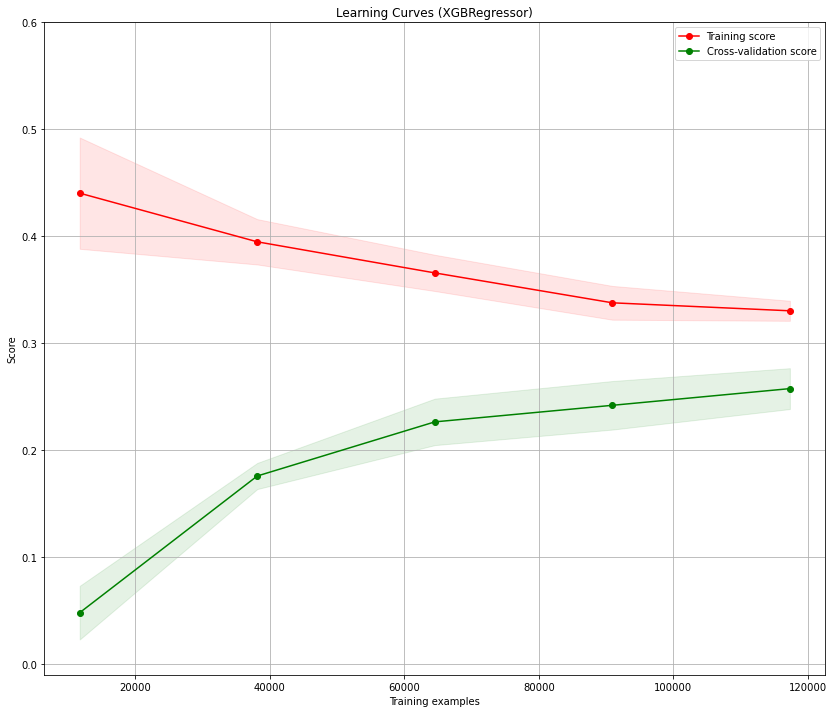

Local score: -48.501244478391776 0.8886085573981249


In [15]:
# local score
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

#визуализация
import matplotlib.pyplot as plt

def plot_learning_curve(model, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(14,12))
    plt.title(title)
    if ylim is not None:plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #mae_scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    #plt.plot(train_sizes, mae_scores, 'o-', color="b", label="MAE")
    
    plt.legend(loc="best")
    return plt

model = xgb.XGBRegressor(max_depth=6, n_estimators=30, random_state=0)

plt = plot_learning_curve(model, "Learning Curves (XGBRegressor)", X_train, y_train, ylim=(-0.01, 0.6), cv=3, n_jobs=4)
plt.show()

scores = cross_val_score(model, X_train, y_train, cv=3, scoring="neg_mean_absolute_error")
print("Local score:", np.mean(scores), np.std(scores))
#5/50 = -48,52
#7/70 = -48,82
#7/60 = -48,76
#7/40 = -48,61
#7/30 = -48,54
#6/30 = -48,50


In [7]:
#Обучение
model = xgb.XGBRegressor(max_depth=5, n_estimators=50, random_state=0)
model.fit(X_train, y_train)

#Прогноз для тестовой выборки
#df_test["delay"] = model.predict(X_test)
y_pred = model.predict(X_test)
y_pred[ y_pred < 0 ] = 0
df_test["delay"] = y_pred
X_train.shape, X_test.shape, df_train.shape, df_test.shape

((175986, 12), (132166, 12), (175986, 20), (132166, 20))

In [8]:
!mkdir -p ../output
df_test[ ["id", "delay"] ].to_csv('../output/prob_stopnames_direct_number_hour_1d_xgboost.csv', index=False) 

## 🤝🗣️ Совместное обсуждение и обмен опытом 💬
Обязательно дай знать, если у Тебя появились вопросы или идеи - вместе мы сможем гораздо больше, чем по отдельности 🤝


#### 👉 Свои вопросы/предложения/ошибки оставляй здесь **[#ds_module3](https://dw-coursesru.slack.com/archives/C02G1J974HG)**
Если увидишь вопрос, на который знаешь ответ - постарайся помочь своему/своей коллеге, ведь когда мы что-то объясняем другим, мы еще больше закрепляем полученный материал. В итоге выигрывают все (наш любимый принцип 4K). Не стесняйся задавать вопросы - глупых вопросов не бывает - ведь Ты здесь, чтобы учиться и получать знания 🙂
Уже во время курса Ты поймешь, сколько дает сотрудничество с другими участниками курса. Это бонус этого курса, и его стоит использовать 🥰.

#### 👉 Своими мыслями и идеями поделись  здесь **[#ds_module3_ideas](https://dw-coursesru.slack.com/archives/C02GR7D5RU0)**. 

## [Анкета](https://form.typeform.com/to/etVoKQoD)
Пожалуйста, оставь обратную связь по данному модулю и задай вопрос/вопросы, а я постраюсь на них ответить на вебинаре. Спасибо!